In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [20]:
data = load_breast_cancer()

X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target) # 0=malignant, 1 = benign

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2, random_state = 42
)

# Feature Scaling (Important for Classification)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

#### Why logistic regression?
- Core classification algorithm
- Outputs probabilities
- Interpretable baseline

### Make Predictions

In [25]:
y_pred = model.predict(X_test_scaled)

### Evaluate Model
Accuracy

In [26]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9736842105263158

In [29]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[41,  2],
       [ 1, 70]], dtype=int64)

#### Interpretation:
- True positives: correctly detected disease
- False negatives: dangerous misses

### Classification Report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##### Key metrics:
- Precision: How reliable positive predictions are
- Recall: How many actual positives were caught
- F1-score: Balance of precision and recall

### Visualize Confusion Matrix

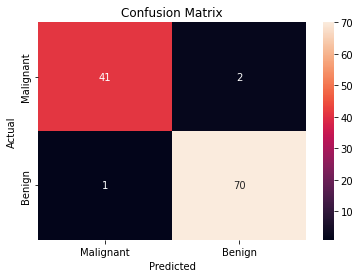

In [30]:
import seaborn as sns

sns.heatmap(conf_matrix,annot=True,fmt="d",
           xticklabels=['Malignant','Benign'],
           yticklabels=['Malignant','Benign'])           
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()